# The Dataset and DataArray objects used in the ocean-carbon package

## Objectives
To introduce the two high-level data structures, `Dataset` and `DataArray`, that are used by the `ocean-carbon` Python package to load and store the ocean biogeochemical grid parameters.

## Introduction
The GEOS-NOBM release files are provided as NetCDF files. This tutorial shows you how to download and open these files using Python code and how to take a look at the structuer of these files. The GEOS-NOBM is available as a number of **datasets** that each contain a few variables.

## Import external packages and modules
Before using Python libraries we must import them. Ususally, this is done at the beginning of every Python program or interactive Jupyter notebook but one can import a library at any point. Python libraries, called **packages**, contain subroutines and define data structures that provide useful functionality. 

Let's import some packages needed for this tutorial:

In [1]:
# NumPy is the fundamental package for scientific computing with Python. 
# It contains among other things:
#    a powerful N-dimensional array object
#    sophisticated (broadcasting) functions
#    tools for integrating C/C++ and Fortran code
#    useful linear algebra, Fourier transform, and random number capabilities
# http://www.numpy.org/
#
# make all functions from the 'numpy' module available with the prefix 'np'
import numpy as np

# xarray is an open source project and Python package that aims to bring the 
# labeled data power of pandas to the physical sciences, by providing
# N-dimensional variants of the core pandas data structures.
# Our approach adopts the Common Data Model for self- describing scientific 
# data in widespread use in the Earth sciences: xarray.Dataset is an in-memory
# representation of a netCDF file.
# http://xarray.pydata.org/en/stable/
#
# import all function from the 'xarray' module available with the prefix 'xr'
import xarray as xr

The syntax 
`import XYZ pacakge as ABC`
allows you to access all subroutines and/or objects in a packages by replacing a long, cumbersome name with a shorter, easier name.

Here, we import `numpy` as `np` and `xarray` as `xp` because typing `np` is eaier than typing `numpy` every time we want to use the package. 

## Open the *ocean-carbon* package
The *ocean-carbon* package is written specifically for working with ocean biogeochemical model NetCDF output. 

See the "Getting Started" page in the tutorial for instructions about installing the *ocean-carbon* module on your machine.

In [ ]:
## Import the ocean-carbon library into Python
## =========================================
## -- If ocean-carbon  is not installed in your local Python library, 
##    tell Python where to find it using sys.path.append.
##    For example, if your ocean-carbon  files are in ~/ocean-carbon /ocean-carbon,
##    you can use:
from os.path import expanduser,join,isdir
import sys
user_home_dir = expanduser('~')
ocean-carbon_dir = join(user_home_dir,ocean-carbon')
if isdir(ocean-carbon_dir):
    sys.path.append(ocean-carbon_dir)
import ocean-carbon as carbon

## Downloading and opening GEOS-NOBM NetCDF files
You can access GEOS-NOBM files through [name repository].

To open the GEOS-NOBM NetCDF files we will use the `open_dataset` command from the Python package [xarray](https://docs.xarray.dev/en/stable/). `xarray` has an `open_dataset` routine which creates a `Dataset` object and loads the contects of the NetCDF file, including its metadata, into a data structure. On the other hand, `xarray` also has another functtion `open_mfdataset` which does the same thing, but also concatenates multiple NetCDF files with compatible dimensions and coordinates.

Let's download and open ocean carbon simulated by GEOS-NOBM from 2050 to 2074.

In [2]:
# Load file into workspace
ds = xr.open_dataset('/glade/work/elsworth/NASA/obio_spinup.geosgcm_obio.CO2_2050-2074.nc4')

What is a *ds*? It is a `Dataset` object is a multi-dimensional, array database that is stored in memory. We can check what type of file it is by performing the command `type()`.

In [3]:
type(ds)

xarray.core.dataset.Dataset

## The Dataset object
A [Dataset](https://docs.xarray.dev/en/stable/generated/xarray.Dataset.html) is a Python is an in-memory object designed to represent the data from the NetCDF file format. 

NetCDF files include information, such as metadata, about the data they contain. When a `Dataset` is created by loading a NetCDF file, all the information about the data, including metadata, is loaded. 

Similarly to a NetCDF file, a `Dataset` can contain many variables. These variables are referred to as `Data Variables` in `xarray`.

`Datasets` contain three classes of fields:
1. Coordinates: arrays which identify the coordinates of the data variables
2. Data Variables: the data variable arrays and their associated coordinates
3. Attributes: metadata describing the datasets

We've loaded the monthly mean files from 2050 to 2074 of surface water *p*CO2 and air-sea carbon flux as the *ds* `Dataset` object. Let's take a look at the contents.

In [4]:
ds

<xarray.Dataset>
Dimensions:  (lon: 720, lat: 361, time: 300)
Coordinates:
  * lon      (lon) float64 -180.0 -179.5 -179.0 -178.5 ... 178.5 179.0 179.5
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * time     (time) datetime64[ns] 2050-01-01 2050-02-01 ... 2074-12-01
Data variables:
    FCO2     (time, lat, lon) float32 ...
    PCO2     (time, lat, lon) float32 ...
Attributes:
    History:      Wed May 22 14:11:45 2024: ncrcat -v PCO2,FCO2 obio_spinup.g...
    Source:       Icarus-3_3_p2
    Title:        S2Sv3_Coupled_OBIO
    Contact:      http://gmao.gsfc.nasa.gov
    Conventions:  COARDS
    Institution:  NASA Global Modeling and Assimilation Office
    References:   http://gmao.gsfc.nasa.gov
    Comment:      S2Sv3_Coupled_OBIO
    NCO:          netCDF Operators version 5.1.4 (Homepage = http://nco.sf.ne...

## Examining the Dataset object contents
Let's go through the *ds* line by line, starting from the top. 

### 1. Object type
`xarray.dataset`

The top line tells us what the type of object the file is. *ds* is an instance of a `Dataset` defined in `xarray`.

### 2. Dimensions
`Dimensions:       (lon: 720, lat: 361, time: 300)`

The *Dimensions* list shows the different dimensions used by all of the different arrays stored in the NetCDF file. Arrays may use any combination of dimensions. 

In the case of this *grid* dataset, we find a 1D (e.g., time) and 2D (e.g., lat/lon) arrays. 

The lengths of these dimensions are next to their name. `lon` and `lat` represent the 2D grid associated with the `Dataset`. The length of the `lon` dimension is 720 and the length of the `lat` dimension is 361. The dimension `time` is the time dimension that corresponds to the start and end times of the monthly-mean average over the time period. This dataset has 25 years for 12 monthly-mean records. The data format of the `time` dimension is in `datetime64` which is an feature of `numpy` which allows us to get the date in a numpy array in a particular format i.e year-month-day by using numpy.datetime64() method.

### 3. Coordinates

`Coordinates:
lon     (lon)  float64 -180.0 -179.5 ... 179.0 179.5` 

`lat     (lat)  float64 -90.0 -89.5 -89.0 ... 89.5 90.0`

`time    (time) datetime64[ns] 2050-01-01 ... 2074-12-01`

These coordinates are arrays whose values label each grid cell in the arrays. They are used for label-based indexing and alignment. There are three coordinates in this `Dataset`, `lon`, `lat`, and `time`.

### 4. Data Variables

`Data variables:
FCO2 (time, lat, lon) float32...`

`PCO2 (time, lat, lon) float32...`

The Data Variables are one or more `xarray.DataArray` objects. `DataArray` objects are labeled, multi-dimensional arrays that may also contain metadata (attributes). `DataArray` objects are very important to understand because they are container objects which store the numerical arrays of the state estimate fields. We'll investigate these objects in more detail after completing our survey of this `Dataset`.

This NetCDF file contains two Data variables, `FCO2` and `PCO2`. Both are stored as a three dimensional array (time, lat, lon) field of two different ocean carbon variables. Each array is on a grid that has two horizontal dimensions (lon,lat) and one time dimension (time).

In [10]:
print(ds.lon.long_name)

longitude


In [7]:
FCO2 = ds['FCO2']

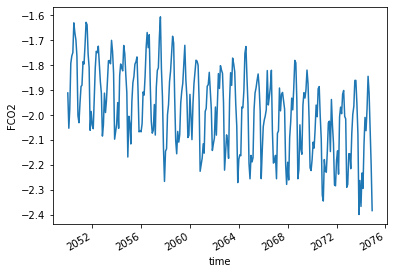

In [9]:
FCO2.mean(['lat','lon']).plot()